# Pymaceuticals Inc.
---

### Analysis

- 
In this  study by Pymaceuticals, Inc., we are reviewing the effects of Capomulin compared to other drug regiems on tumors found in mice 
There are 10 drugs in this study Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn and Zoniferol
Out of all 10 Drugs only one to out preform Capomulin was Ramicane as it has lowest tumor Mean,median,Variance,Stander Deviatio and SEM
Ramican and Capomulin had a equal number of observed timestamps
The avrage tumor size for mice gettiung treated with Capomulin was 40.675741 cerse the avrage of mice treated with Ramicane 40.216745
There is a strong coraltion between the weight of a mice to the size in tumor  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
inner_merged_total = pd.merge(mouse_metadata, study_results,)

# Display the data table for preview
inner_merged_total

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df2 = inner_merged_total.rename(columns={'Mouse ID':'MouseID'})
mouse_count = df2["MouseID"].unique()
nrows = mouse_count.shape[0]
nrows

249

In [3]:
#Check and correct data types
df2["Mouse ID"] = df2["MouseID"].astype("string")
df2["Drug Regimen"] = df2["Drug Regimen"].astype("string")
df2["Sex"] = df2["Sex"].astype("string")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MouseID             1893 non-null   object 
 1   Drug Regimen        1893 non-null   string 
 2   Sex                 1893 non-null   string 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
 8   Mouse ID            1893 non-null   string 
dtypes: float64(1), int64(4), object(1), string(3)
memory usage: 133.2+ KB


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
df2 = df2.set_index(['MouseID', 'Timepoint']).reset_index()
df2
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dm = df2[df2.duplicated(subset=['MouseID', 'Timepoint'], keep=False)]['MouseID'].unique()
print(f'The following mice have duplicate entries: {", ".join(dm)}.')

The following mice have duplicate entries: g989.


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df3 = df2[df2['Mouse ID'].isin(dm)]
df3

,MouseID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Mouse ID
908,g989,0,Propriva,Female,21,26,45.000000,0,g989
909,g989,0,Propriva,Female,21,26,45.000000,0,g989
910,g989,5,Propriva,Female,21,26,48.786801,0,g989
911,g989,5,Propriva,Female,21,26,47.570392,0,g989
912,g989,10,Propriva,Female,21,26,51.745156,0,g989
913,g989,10,Propriva,Female,21,26,49.880528,0,g989
914,g989,15,Propriva,Female,21,26,51.325852,1,g989
915,g989,15,Propriva,Female,21,26,53.442020,0,g989
916,g989,20,Propriva,Female,21,26,55.326122,1,g989
917,g989,20,Propriva,Female,21,26,54.657650,1,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df4 = df2[~df2['MouseID'].isin(dm)]
df4

,MouseID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Mouse ID
0,k403,0,Ramicane,Male,21,16,45.000000,0,k403
1,k403,5,Ramicane,Male,21,16,38.825898,0,k403
2,k403,10,Ramicane,Male,21,16,35.014271,1,k403
3,k403,15,Ramicane,Male,21,16,34.223992,1,k403
4,k403,20,Ramicane,Male,21,16,32.997729,1,k403
...,...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2,z969
1889,z969,30,Naftisol,Male,9,30,65.841013,3,z969
1890,z969,35,Naftisol,Male,9,30,69.176246,4,z969
1891,z969,40,Naftisol,Male,9,30,70.314904,4,z969


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = df4["MouseID"].nunique()
nrows = mouse_count
nrows

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standD= inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

DrugDf = pd.DataFrame({"Mean": mean, "median": median,"Variance": variance, "Stander Deviation": standD, "SEM": Sem})
DrugDf

,Mean,median,Variance,Stander Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single
DFDrug = inner_merged_total .groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
DFDrug

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

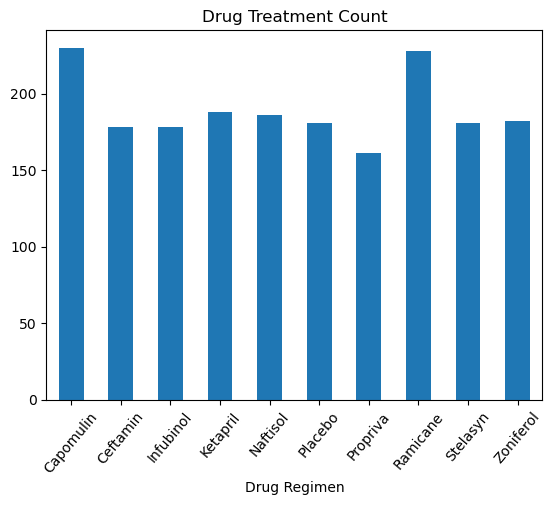

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Regimen = pd.DataFrame(inner_merged_total.groupby(["Drug Regimen"]).count()).reset_index()
Drugs_df = Drug_Regimen[["Drug Regimen", "Mouse ID"]]
Drugs_df = Drugs_df.set_index("Drug Regimen")

Drugs_df.plot(kind="bar", legend=False,rot=50)
plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()
plt.savefig('barplot1')

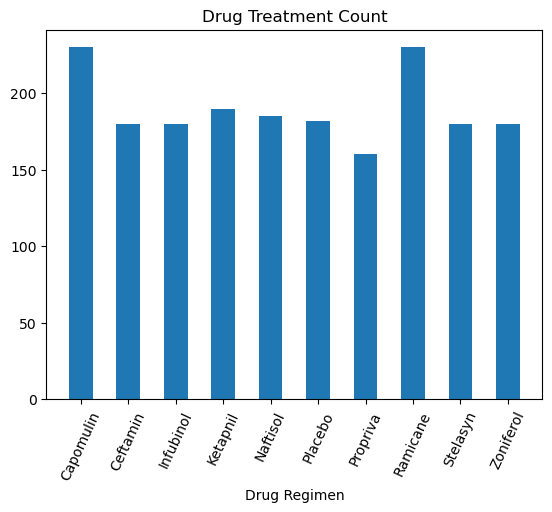

<Figure size 600x400 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
DrugsRegimem = ['Capomulin','Ceftamin','Infubinol','Ketapnil','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
rows = [230,180,180,190,185,182,160,230,180,180] 

#plot bar chart
plt.bar(DrugsRegimem,rows,width=0.5)
plt.title('Drug Treatment Count')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 65) 
plt.figure(figsize=(6, 4))
plt.show() 

Text(0, 0.5, 'Sex')

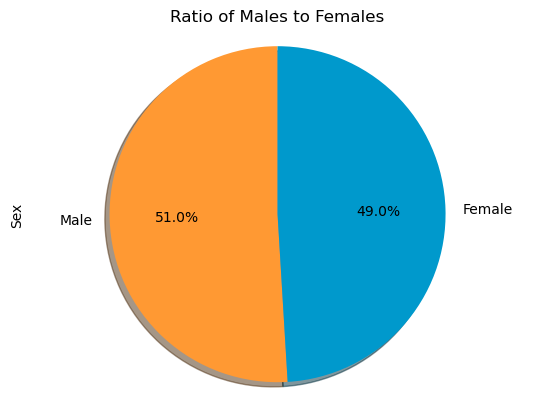

In [12]:
MF = pd.DataFrame(df4)['Sex'].value_counts()
colors = ["#FF9933", "#0099cc"]
MF.plot(kind='pie', colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Ratio of Males to Females")
plt.axis("equal")
plt.ylabel('Sex')

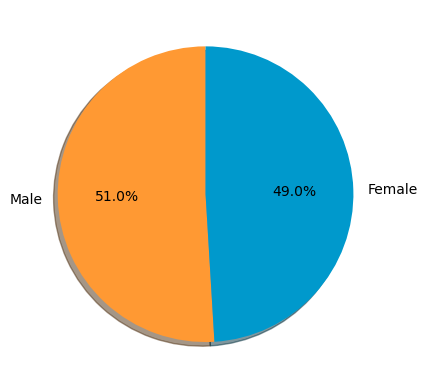

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(MF.values, labels=MF.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume =df4.loc[df4['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
tumor_volume.head(15)
# Start by getting the last (greatest) timepoint for each mouse

lt = tumor_volume.groupby('MouseID')['Timepoint'].last()
lt
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ftv = pd.merge(lt,df4, how='left', on=["MouseID", "Timepoint"])
ftv

,MouseID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Mouse ID
0,a203,45,Infubinol,Female,20,23,67.973419,2,a203
1,a251,45,Infubinol,Female,21,25,65.525743,1,a251
2,a275,45,Ceftamin,Female,20,28,62.999356,3,a275
3,a411,45,Ramicane,Male,3,22,38.407618,1,a411
4,a444,45,Ramicane,Female,10,25,43.047543,0,a444
...,...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4,y769
96,y793,45,Capomulin,Male,17,17,31.896238,2,y793
97,y865,45,Ceftamin,Male,23,26,64.729837,3,y865
98,z578,45,Ramicane,Male,11,16,30.638696,0,z578


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    rows = ftv.loc[ftv['Drug Regimen'] == treatment]

    # add subset 

    tumor_volumes = rows['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds


In [16]:
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volumes is: 48.72207785
The upper quartile of tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The the median of tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


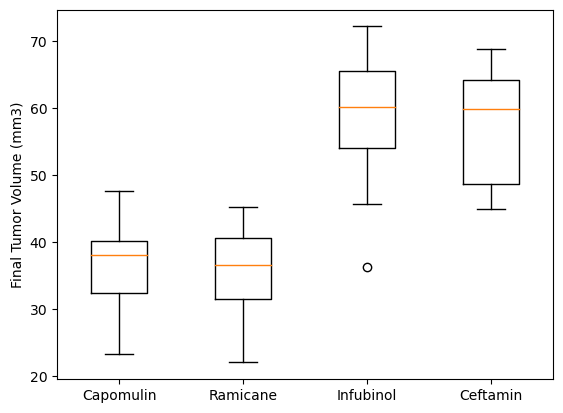

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

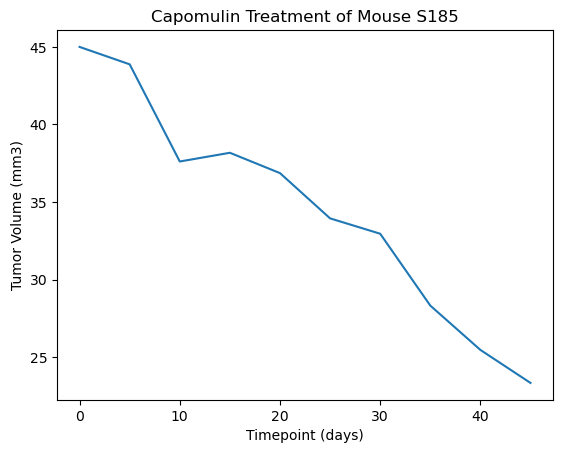

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cd = df4[df4['Drug Regimen'] == 'Capomulin']
mouse_data = cd[cd['Mouse ID'] == 's185']

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse S185')
plt.show()

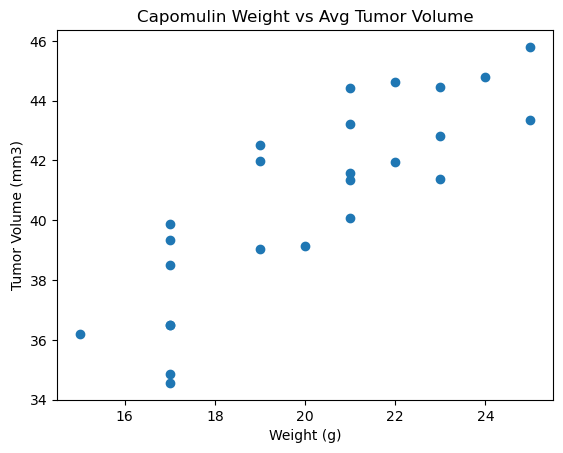

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
w= cd.groupby('Mouse ID')['Weight (g)'].mean()
atv = cd.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(w, atv)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Weight vs Avg Tumor Volume')
plt.show()

## Correlation and Regression

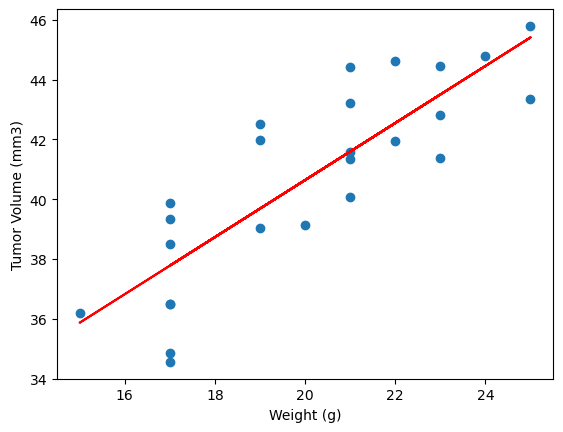

The correlation coefficient between mouse weight and the average tumor volume is 0.84


In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = w
y_values = atv
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.5, 1), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(w,atv)[0],2)}")
